In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
import os

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')




[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


training_set = train_datagen.flow_from_directory(
        'flowers',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')

Found 3510 images belonging to 5 classes.


In [15]:
# Print the class labels\
data_set_name = training_set.class_indices
print(training_set.class_indices)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'flower_test',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')

Found 806 images belonging to 5 classes.


flower_iterator = training_set.as_numpy_iterator()
batch = flower_iterator.next()

import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(50, 50))
for idx, img in enumerate(batch[0][:16]):
    ax[idx // 4, idx % 4].imshow(img.astype(int))
    ax[idx // 4, idx % 4].set_title(batch[1][idx]) 

plt.show()

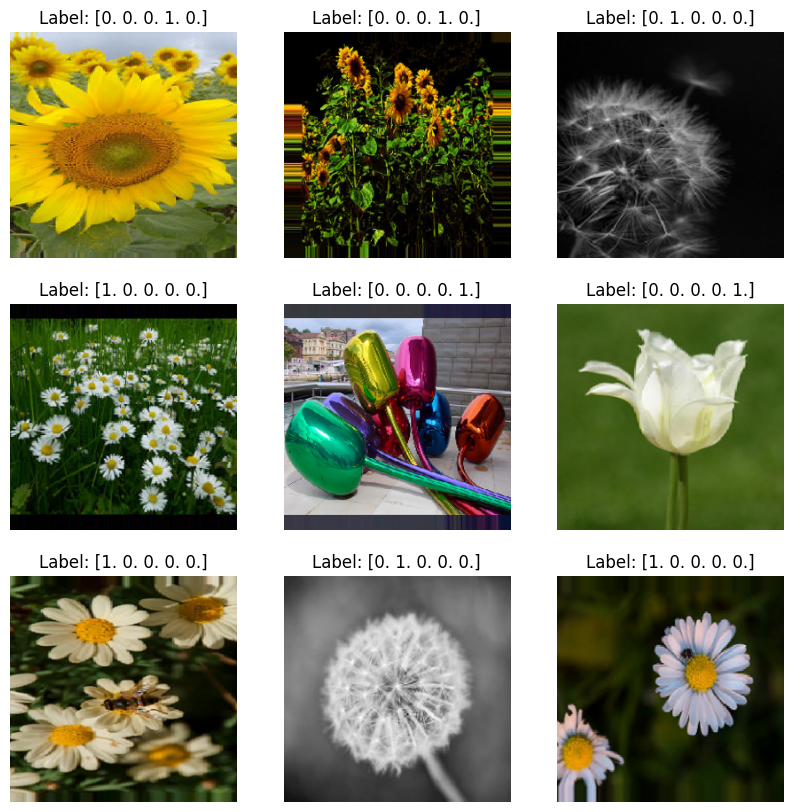

In [5]:
import matplotlib.pyplot as plt

# Access a batch of images from the training set
images, labels = training_set.next()

# Display the first few images along with their labels
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.show()


train_size = int(len(flower_data_set)*.8)
val_size = int(len(flower_data_set)*.2)
test_size = int(len(flower_data_set)*.1)

train = flower_data_set.take(train_size)
val = flower_data_set.skip(train_size).take(val_size)
test = flower_data_set.skip(train_size+val_size).take(test_size)

for batch in train.as_numpy_iterator():
    images, labels = batch
    print(images.shape)
    print(labels)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape= (256,256,3)))
#model.add(Dropout(0.5))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3), 1, activation = "relu" ))
#model.add(Dropout(0.5))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3), 1, activation = "relu" ))
#model.add(Dropout(0.5))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3), 1, activation = "relu" ))
#model.add(Dropout(0.5))
model.add(MaxPooling2D())
model.add(Conv2D(256,(3,3), 1, activation = "relu" ))
#model.add(Dropout(0.5))
model.add(MaxPooling2D())
model.add(Conv2D(512,(3,3), 1, activation = "relu" ))
#model.add(Dropout(0.5))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

In [8]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [10]:
# Print the shape of the output tensor after each layer
for layer in model.layers:
    print(layer.__class__.__name__, layer.output_shape)


Conv2D (None, 254, 254, 16)
MaxPooling2D (None, 127, 127, 16)
Conv2D (None, 125, 125, 32)
MaxPooling2D (None, 62, 62, 32)
Conv2D (None, 60, 60, 16)
MaxPooling2D (None, 30, 30, 16)
Conv2D (None, 28, 28, 128)
MaxPooling2D (None, 14, 14, 128)
Conv2D (None, 12, 12, 256)
MaxPooling2D (None, 6, 6, 256)
Conv2D (None, 4, 4, 512)
MaxPooling2D (None, 2, 2, 512)
Flatten (None, 2048)
Dense (None, 256)
Dense (None, 5)


In [11]:
model_traning = model.fit(training_set, validation_data = test_set, epochs=20)

Epoch 1/20
110/110 [==============================] - 54s 451ms/step - loss: 0.4990 - accuracy: 0.2570 - val_loss: 0.4594 - val_accuracy: 0.3660
Epoch 2/20
110/110 [==============================] - 49s 442ms/step - loss: 0.4160 - accuracy: 0.4484 - val_loss: 0.3734 - val_accuracy: 0.5074
Epoch 3/20
110/110 [==============================] - 50s 449ms/step - loss: 0.3346 - accuracy: 0.6131 - val_loss: 0.3003 - val_accuracy: 0.6315
Epoch 4/20
110/110 [==============================] - 49s 443ms/step - loss: 0.3063 - accuracy: 0.6578 - val_loss: 0.3023 - val_accuracy: 0.6439
Epoch 5/20
110/110 [==============================] - 49s 450ms/step - loss: 0.2876 - accuracy: 0.6818 - val_loss: 0.2640 - val_accuracy: 0.7047
Epoch 6/20
110/110 [==============================] - 49s 449ms/step - loss: 0.2759 - accuracy: 0.6917 - val_loss: 0.2731 - val_accuracy: 0.6476
Epoch 7/20
110/110 [==============================] - 49s 441ms/step - loss: 0.2547 - accuracy: 0.7248 - val_loss: 0.2671 - val_ac

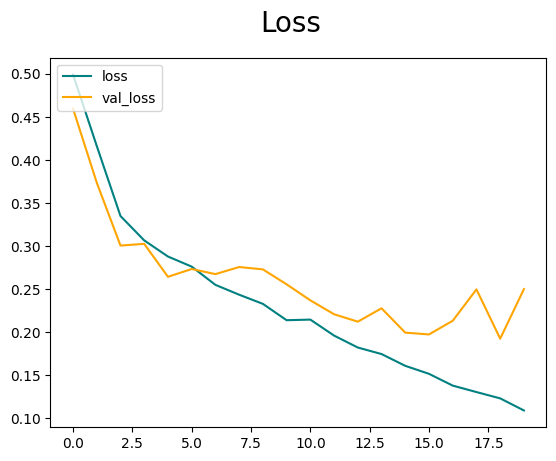

In [12]:
fig = plt.figure()
plt.plot(model_traning.history['loss'], color='teal', label='loss')
plt.plot(model_traning.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

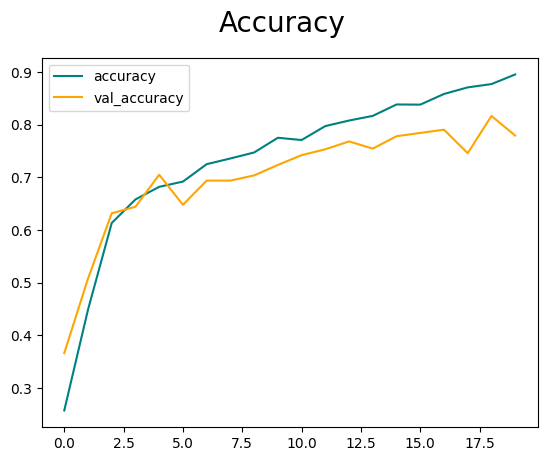

In [13]:
fig = plt.figure()
plt.plot(model_traning.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_traning.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [14]:
from keras.models import save_model

# Save the model
model.save("your_model_name.h5")


import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Function to load and preprocess image
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return np.expand_dims(img_array, axis=0)

# Function to predict class label of an image
def predict_image_class(model, img_path):
    preprocessed_img = load_and_preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)
    class_idx = np.argmax(prediction)
    return class_idx

# Path to the test folder
test_folder = 'predict_flower'

# Path to your saved model file
#model_path = 'your_model_name.h5'



# Iterate through the images in the test folder and make predictions
for root, dirs, files in os.walk(test_folder):
    for file in files:
        img_path = os.path.join(root, file)
        predicted_class_idx = predict_image_class(model, img_path)
        print(f"Predicted class index for image {img_path}: {predicted_class_idx}")

1/1 [==============================] - 0s 186ms/step


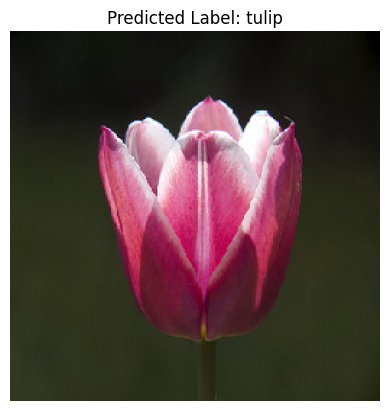

1/1 [==============================] - 0s 41ms/step


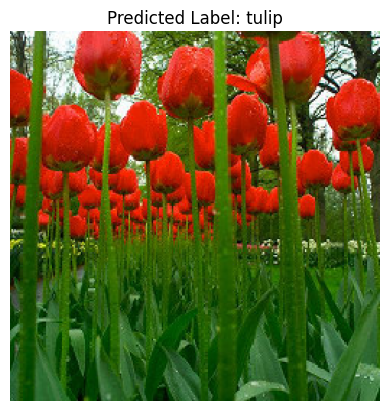

1/1 [==============================] - 0s 41ms/step


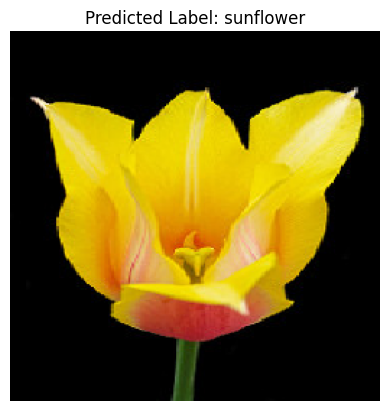

1/1 [==============================] - 0s 40ms/step


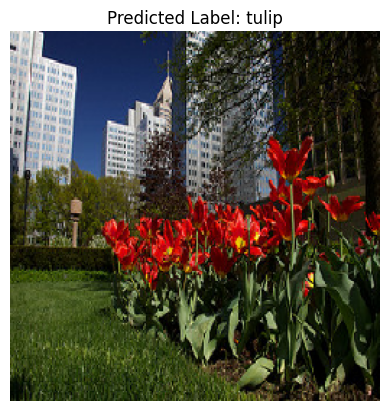

1/1 [==============================] - 0s 40ms/step


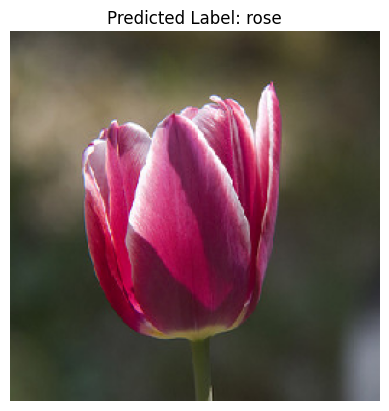

1/1 [==============================] - 0s 46ms/step


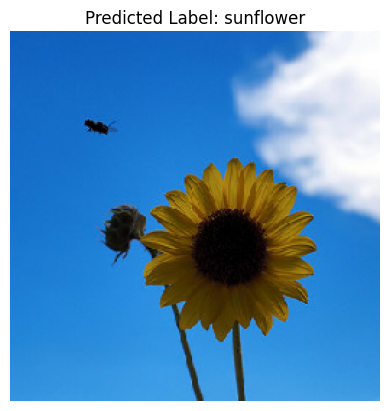

1/1 [==============================] - 0s 37ms/step


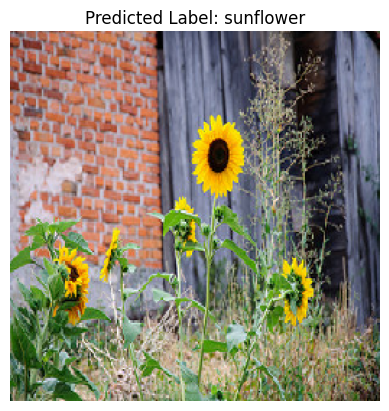

1/1 [==============================] - 0s 42ms/step


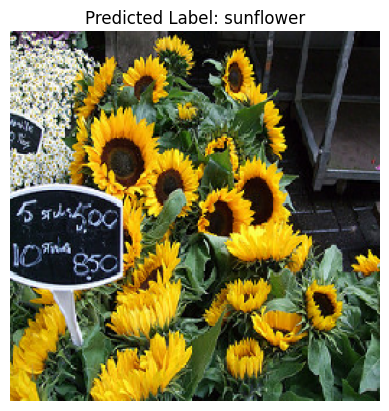

1/1 [==============================] - 0s 44ms/step


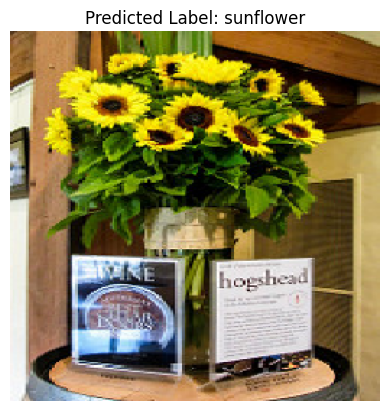

1/1 [==============================] - 0s 40ms/step


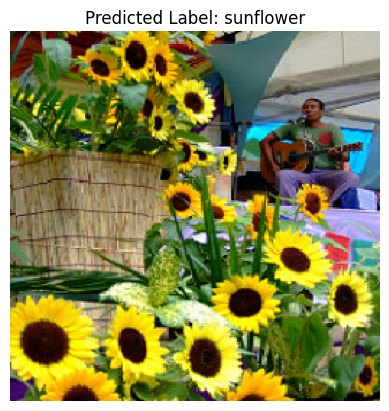

1/1 [==============================] - 0s 56ms/step


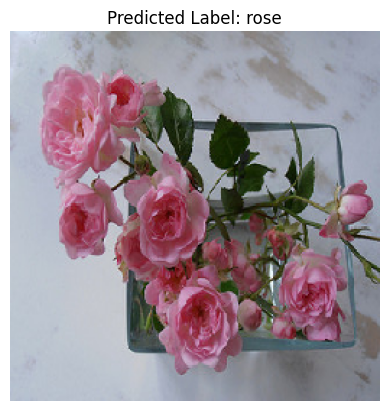

1/1 [==============================] - 0s 48ms/step


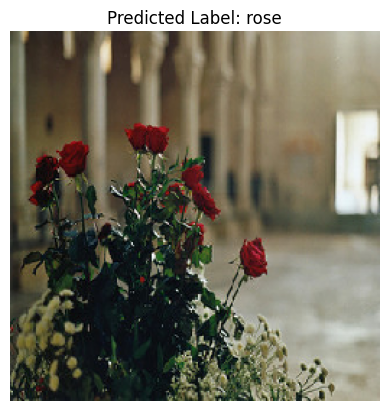

1/1 [==============================] - 0s 43ms/step


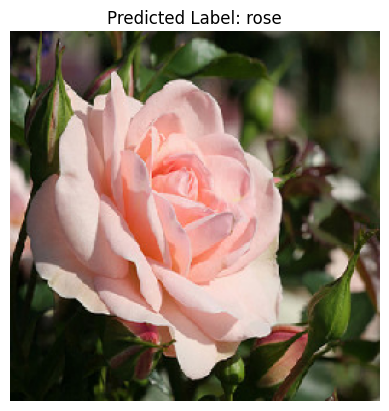

1/1 [==============================] - 0s 56ms/step


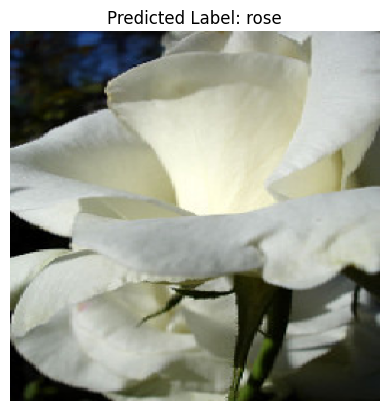

1/1 [==============================] - 0s 41ms/step


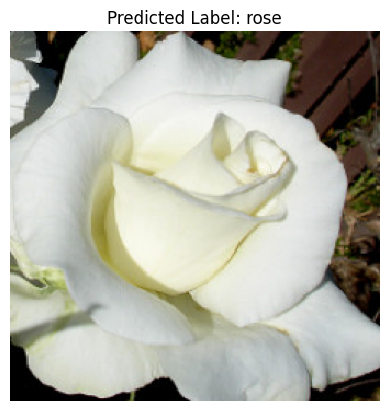

1/1 [==============================] - 0s 65ms/step


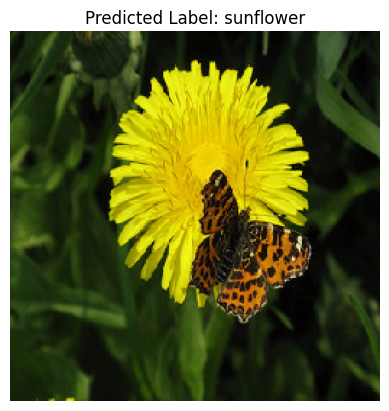

1/1 [==============================] - 0s 46ms/step


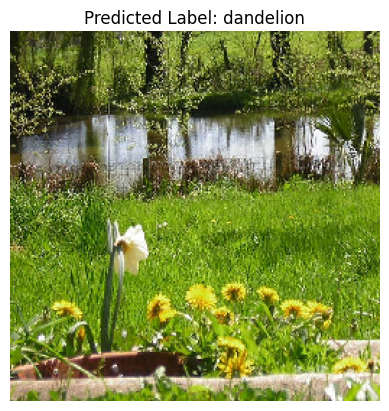

1/1 [==============================] - 0s 49ms/step


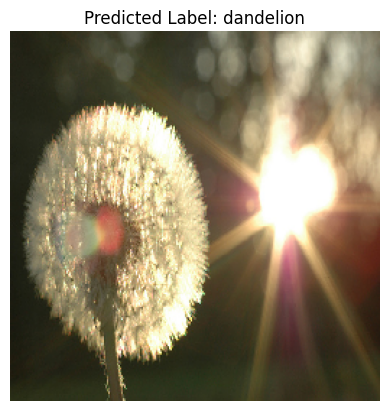

1/1 [==============================] - 0s 38ms/step


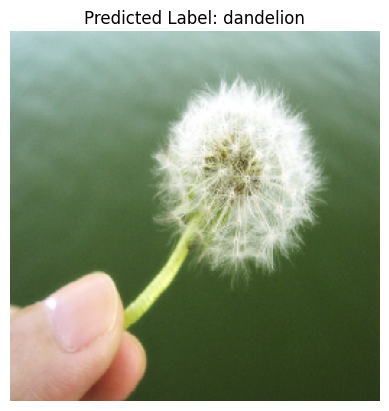

1/1 [==============================] - 0s 41ms/step


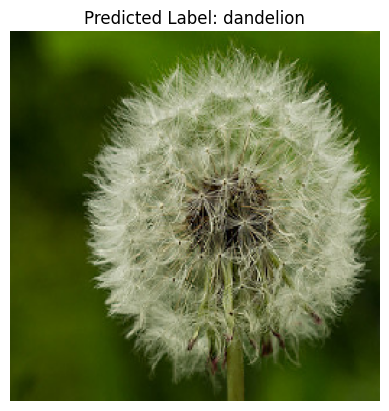

1/1 [==============================] - 0s 40ms/step


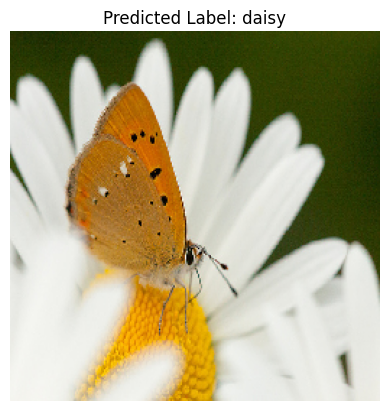

1/1 [==============================] - 0s 53ms/step


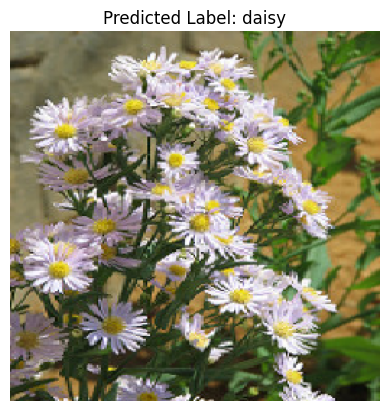

1/1 [==============================] - 0s 56ms/step


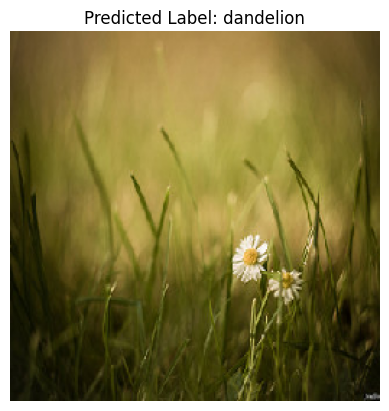

1/1 [==============================] - 0s 48ms/step


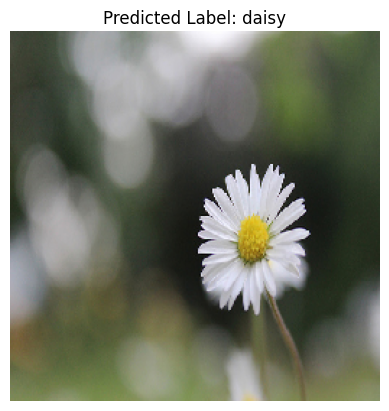

1/1 [==============================] - 0s 40ms/step


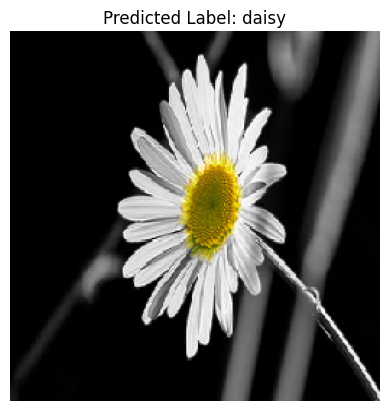

In [16]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model("your_model_name.h5")

# Dictionary mapping numerical labels to class names
class_labels = {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Path to the folder containing images to be predicted
folder_path = "predict_flower"

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Make predictions for each image and display the result
for img_path in image_files:
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    predicted_label_index = np.argmax(prediction)
    predicted_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_label_index)]
    
    # Display the image along with its predicted label
    plt.imshow(img)
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis("off")
    plt.show()
